### IMPORTING LIBRARIES, AND CREATING JUST ONE DATASET WITH ALL ARCHIVES

In [188]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
import plotly.express as px

In [189]:
"""
meses = {
    'jan': 1,
    'fev': 2,
    'mar': 3,
    'abr': 4,
    'mai': 5,
    'jun': 6,
    'jul': 7,
    'ago': 8,
    'set': 9,
    'out': 10,
    'nov': 11,
    'dez': 12,
}
caminho_bases = pathlib.Path('dataset')

bases = []

for arquivo in caminho_bases.iterdir():
    ano = int(arquivo.name[-8:].replace('.csv',''))
    mes = meses[arquivo.name[:3]]
   
    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    
    bases.append(df)

base_airbnb = pd.concat(bases)
base_airbnb.to_csv('totalDFS.csv', encoding='utf-8')
display (base_airbnb)
"""
base_airbnb = pd.read_csv('totalDFS.csv')
display (base_airbnb)

C:\Users\bejr2\AppData\Local\Temp\ipykernel_23072\3002198508.py:34: DtypeWarning:

Columns (28,62,63,88) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,34324,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
902206,34325,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
902207,34326,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
902208,34327,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


### INITIAL ADJUSTMENTS

In [190]:
#Começar a excluir algumas colunas que não serão utilizadas para a análise de preços como: ID, nomes e etc

#Vou criar um arquivo xlsv para fazer uma breve análise qualitativa das 108 colunas

#base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')

In [191]:
#Alguns testes para descobrir quais valores manter
print(base_airbnb['experiences_offered'].value_counts()) 
print('')
print((base_airbnb['host_listings_count']==base_airbnb['host_total_listings_count']).value_counts())
print('')
print(base_airbnb['square_feet'].isnull().sum()) 

experiences_offered
none    902210
Name: count, dtype: int64

True     901750
False       460
Name: count, dtype: int64

888162


In [192]:
planilha_colunas = pd.read_csv(r'primeiros_registros1.CSV', on_bad_lines='skip')
aux_colunas = list(planilha_colunas.columns)
colunas = (aux_colunas[0].split(";"))
print (colunas)

base_airbnb = base_airbnb.loc[:, colunas]
display (base_airbnb)

['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']


,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902206,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902207,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
902208,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


In [193]:
#Tratar os valores NAN
print("Antes do tratamento: ")
print (base_airbnb.isnull().sum())

#Retirar colunas que possuem mais do que 300000 NaN para evitar erros por falta de dados
for column in base_airbnb:
    if base_airbnb[column].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(column, axis=1)
print("\nDepois do tratamento: ")
print (base_airbnb.isnull().sum())

Antes do tratamento: 
host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin       

In [194]:
#Excluir agora as linhas que possuem NaN
base_airbnb = base_airbnb.dropna()

print("\n Pós tratamento final!: ")
print (base_airbnb.shape)
print (base_airbnb.isnull().sum())


 Pós tratamento final!: 
(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


In [195]:
print (base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

In [196]:
#Ajustar price e extrapeople para float

base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
base_airbnb['price'] = base_airbnb['price'].str.replace(',','')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)

base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)

print (base_airbnb.dtypes)
print ('-'*60)
print (base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

### STARTING TO ANALYSE IT

[]

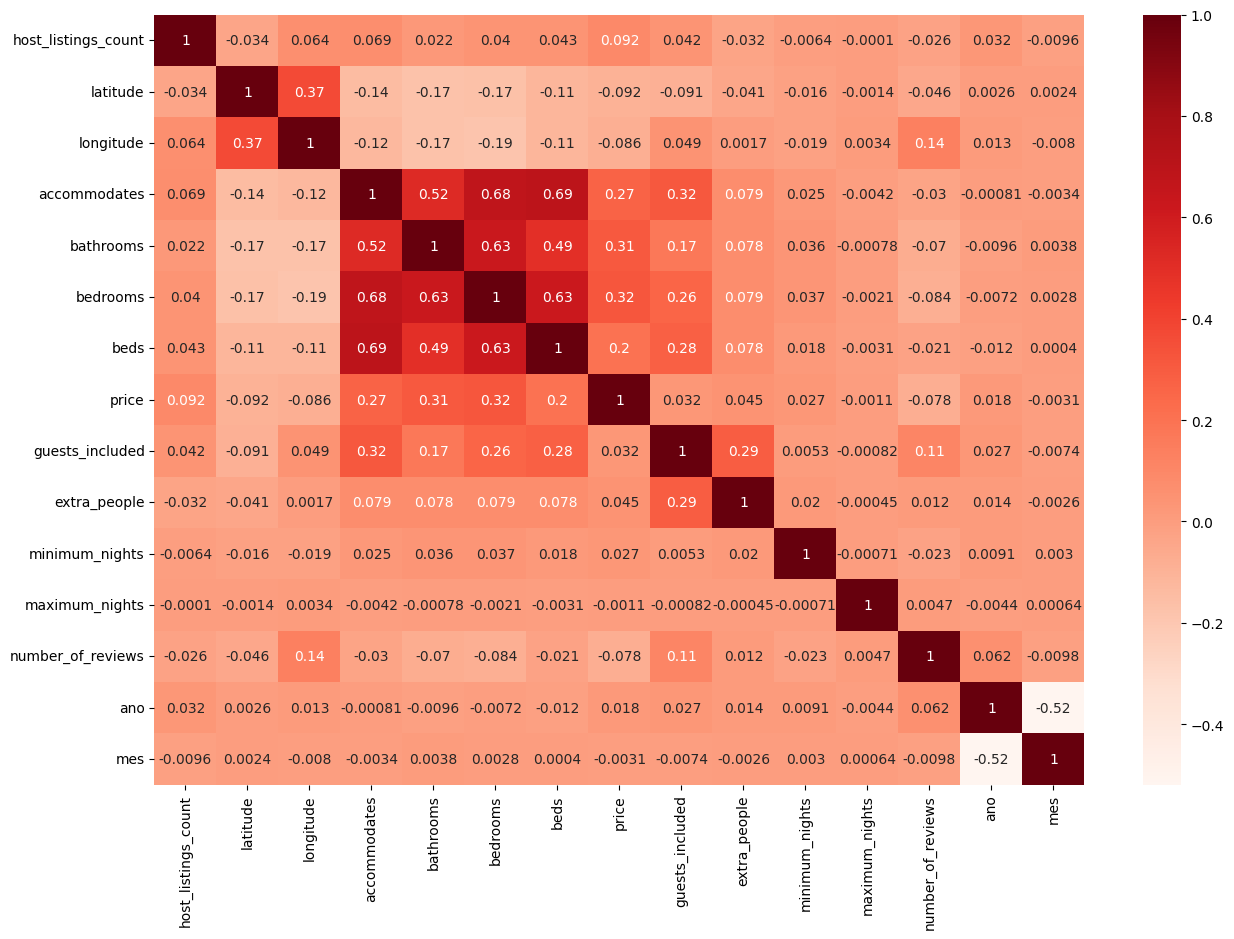

In [197]:
#Análise exploratória

#Correlação das colunas numéricas
#print (base_airbnb.corr(numeric_only=True))
#Gerar gráficos para representar essa correlação
plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb.corr(numeric_only=True),annot=True, cmap='Reds')
plt.plot()



### CREATING FUNCTIONS TO PLOT GRAPHS AND TREAT OUTLIERS

In [198]:

def limits(df, str_column):
    # Limites inferiores e superiores
    column = df[str_column]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amplitude = q3 - q1
    up_limit =  q3 + amplitude * 1.5 
    inf_limit = q1 - amplitude * 1.5 
    return inf_limit, up_limit

def box_graph(df, str_column):
    # Diagrama de caixa
    column = df[str_column]
    fig, (ax1,ax2) = plt.subplots(1,2)  
    fig.set_size_inches(15, 5)
    sns.boxplot(x=column, ax=ax1)
    ax2.set_xlim(limits(df, str_column))
    sns.boxplot(x=column, ax=ax2)

def hist_graph(df, str_column):
    # Histograma
    column = df[str_column]
    plt.figure(figsize=(15,10))
    sns.displot(column, kde=True)

def bar_graph(df, str_column):
    column = df[str_column]
    y_axis = column.value_counts()
    x_axis = column.value_counts().index
    ax = sns.barplot(x=x_axis, y=y_axis)
    ax.set_xlim(limits(df, str_column))
    
def check_outliers(df, str_column):

    inf_lim, up_lim = limits(df, str_column)

    outliers_df = df[ ((df[str_column]) > up_lim) | ((df[str_column]) < inf_lim) ] 
    outliers_qt = outliers_df.shape[0]
    outliers_percent = str(round(outliers_qt / (df.shape[0]) * 100, 2)) + " %"
    resp = 'Y'#input(f'Na coluna {str_column}, os outliers definidos a partir dos limites superiores e inferiores ({inf_lim} e {up_lim}) correspondem a {outliers_percent} das linhas totais! \nDeseja excluir esses outliers? Y/N')
    if resp == 'Y':
        df = df.loc[((df[str_column]) <= up_lim) & ((df[str_column]) >= inf_lim), :]
        print (f'Pronto, foram removidas {outliers_qt} linhas do seu DataFrame e restaram {df.shape[0]} linhas dentro dos limites estabelecidos.')
        limits(df, str_column)
        box_graph(df, str_column)
        hist_graph(df, str_column)
        return df
    else:
        print ('Ok! Seu dataframe continuará intacto.')
        return df




### ANALYSING CONTINUOS DATAS

#### PRICE

(-524.0, 1276.0)


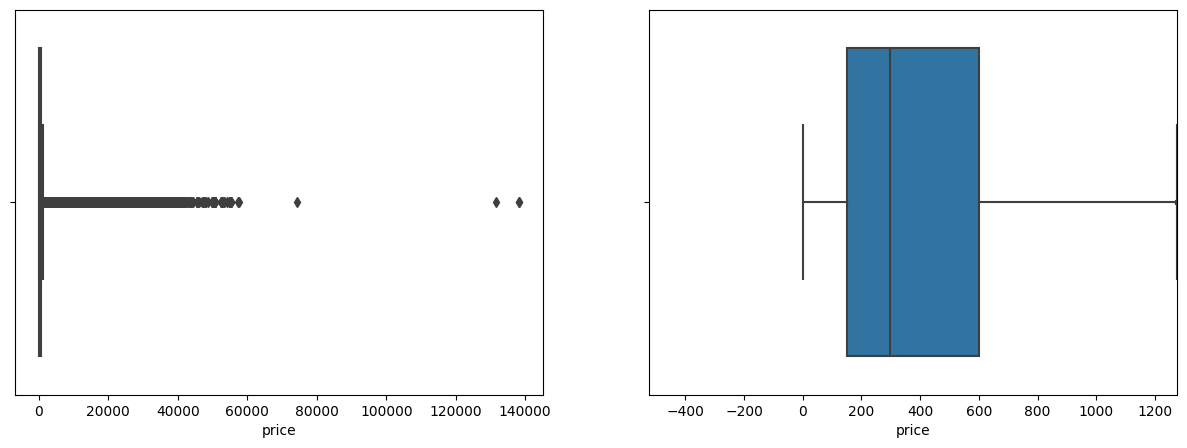

<Figure size 1500x1000 with 0 Axes>

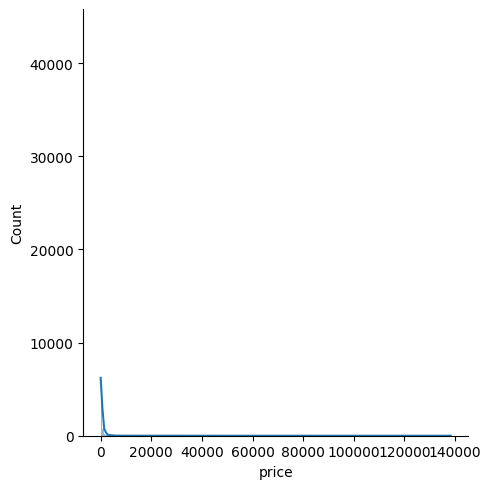

In [199]:
print(limits(base_airbnb, 'price'))
box_graph(base_airbnb, 'price')
hist_graph(base_airbnb, 'price')

Pronto, foram removidas 87282 linhas do seu DataFrame e restaram 810427 linhas dentro dos limites estabelecidos.


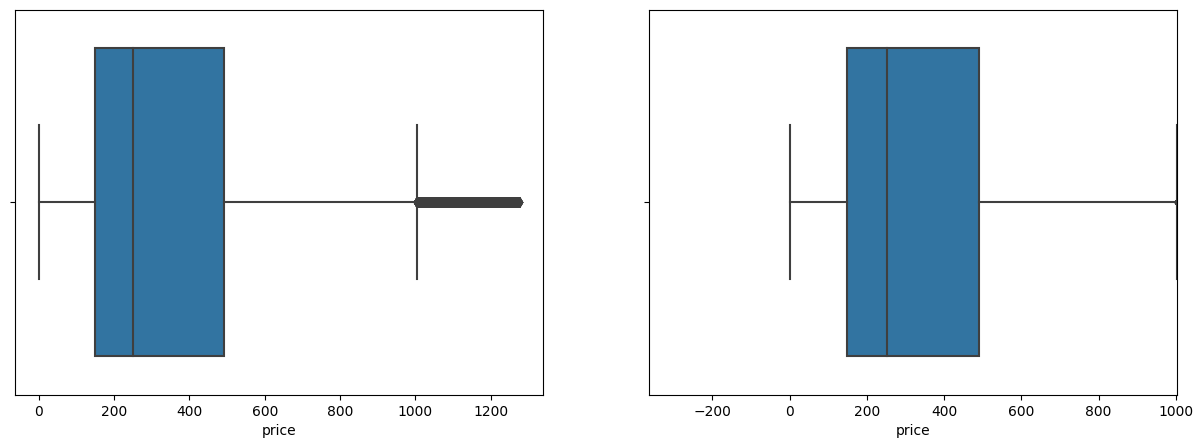

<Figure size 1500x1000 with 0 Axes>

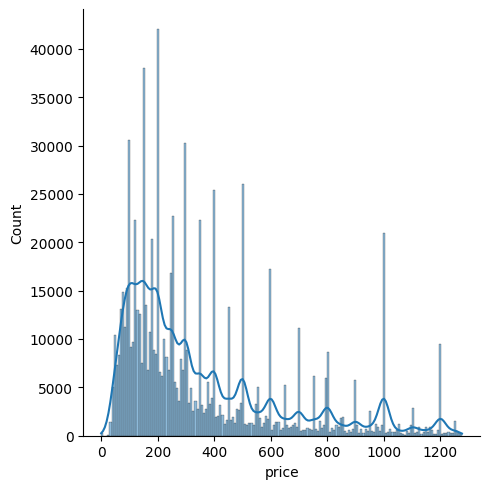

In [200]:
base_airbnb = check_outliers(base_airbnb, 'price')

#### EXTRA PEOPLE PRICING

(-75.0, 125.0)


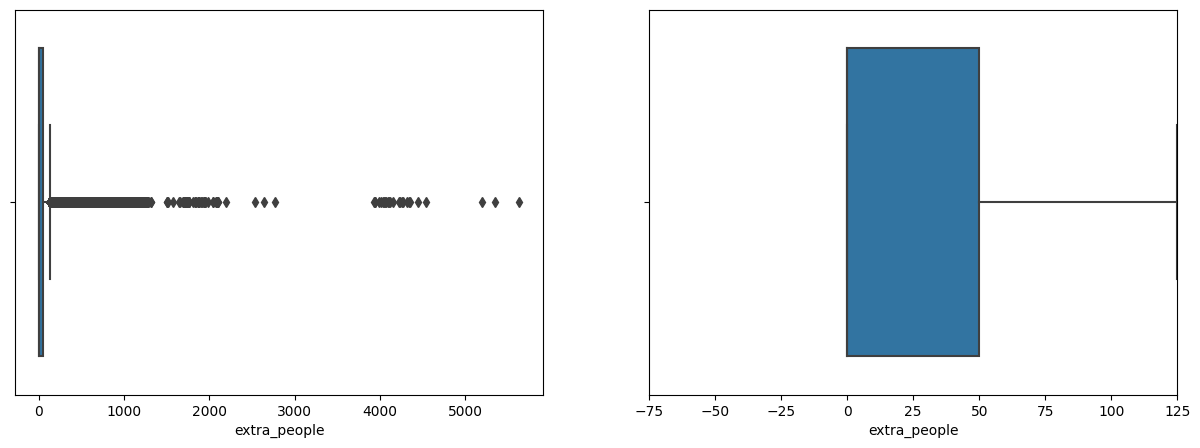

<Figure size 1500x1000 with 0 Axes>

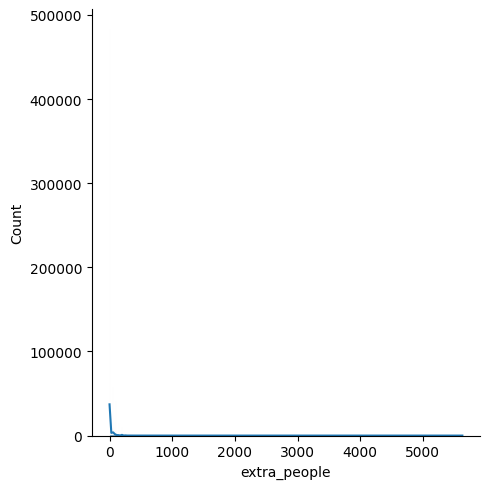

In [201]:
print(limits(base_airbnb, 'extra_people'))
box_graph(base_airbnb, 'extra_people')
hist_graph(base_airbnb, 'extra_people')

Pronto, foram removidas 59194 linhas do seu DataFrame e restaram 751233 linhas dentro dos limites estabelecidos.


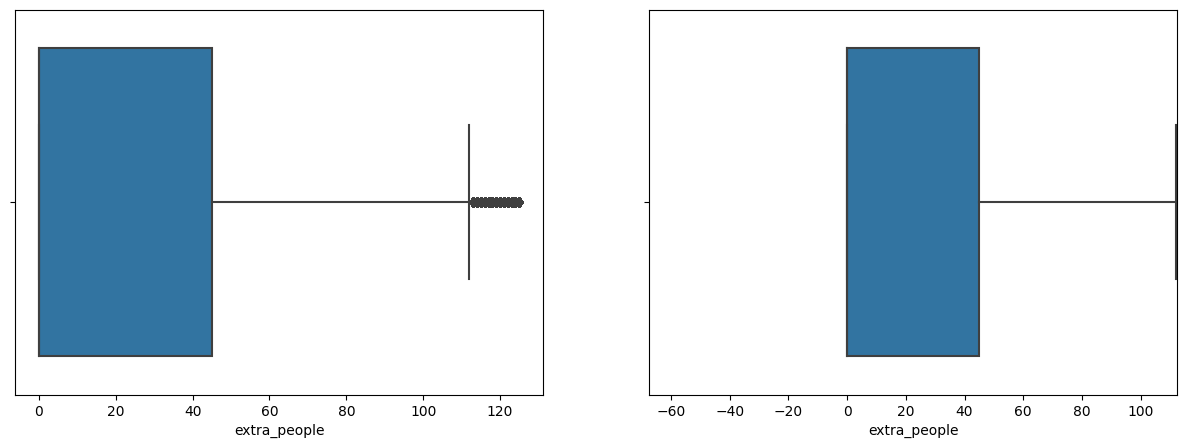

<Figure size 1500x1000 with 0 Axes>

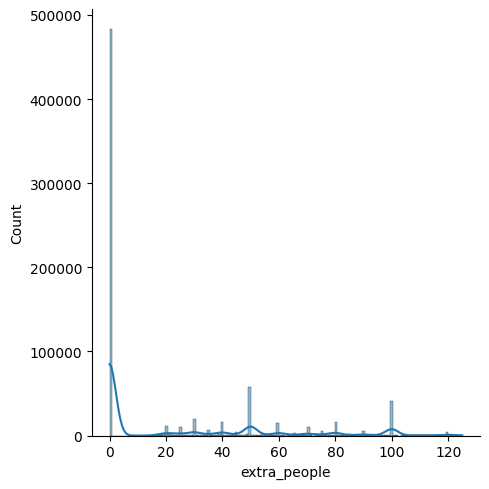

In [202]:
base_airbnb = check_outliers(base_airbnb, 'extra_people')

### ANALYSING DISCRET DATAS

#### HOST_LISTING_COUNT

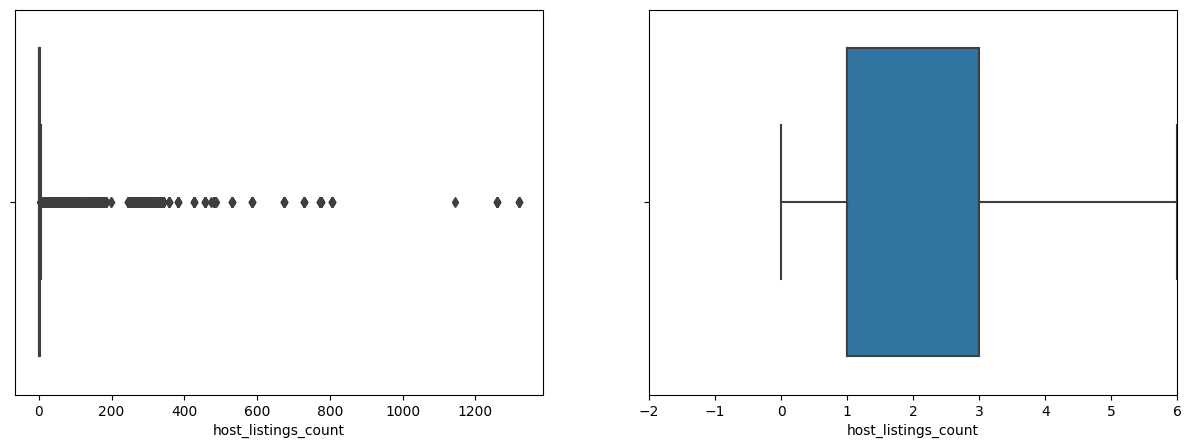

<Figure size 1500x1000 with 0 Axes>

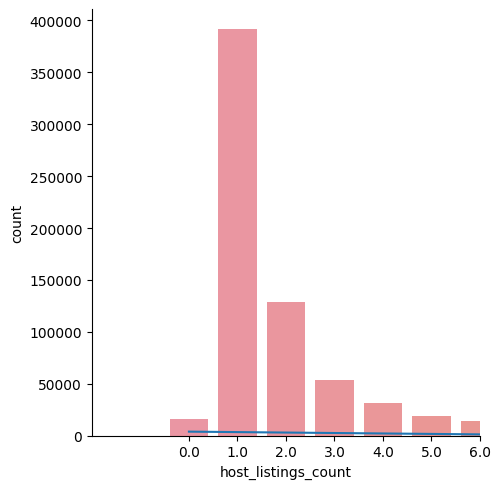

In [203]:
box_graph(base_airbnb, 'host_listings_count')
hist_graph(base_airbnb, 'host_listings_count')
bar_graph(base_airbnb,'host_listings_count') 



Pronto, foram removidas 97723 linhas do seu DataFrame e restaram 653510 linhas dentro dos limites estabelecidos.


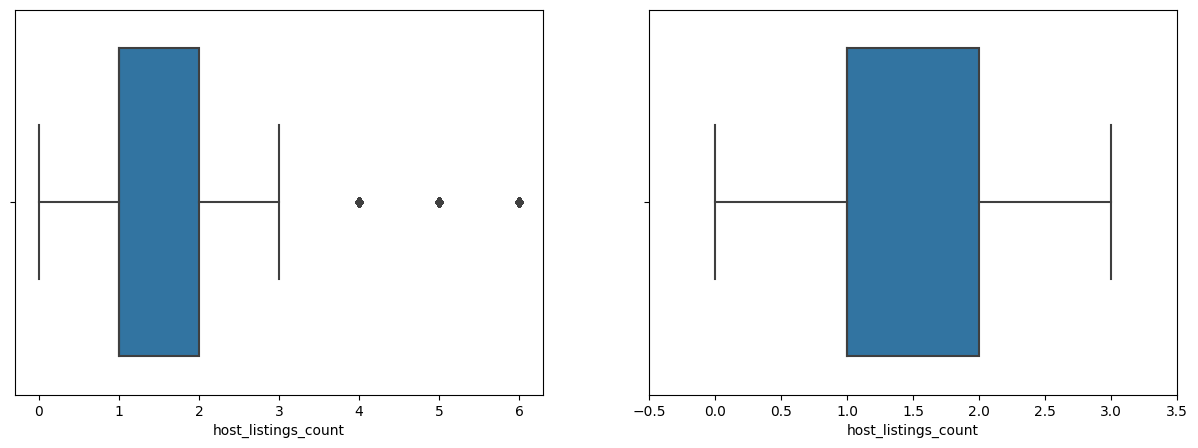

<Figure size 1500x1000 with 0 Axes>

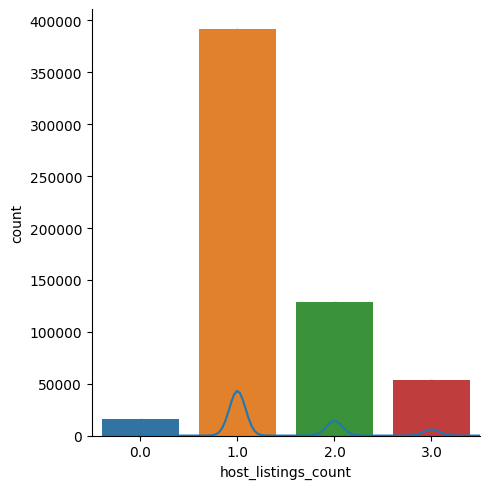

In [204]:
# Para evitar pegar anuncios de imobiliárias (muitos imóveis anunciados), irei retirar esses outliers
base_airbnb = check_outliers(base_airbnb, 'host_listings_count')
bar_graph (base_airbnb, 'host_listings_count')

#### ACCOMMODATES

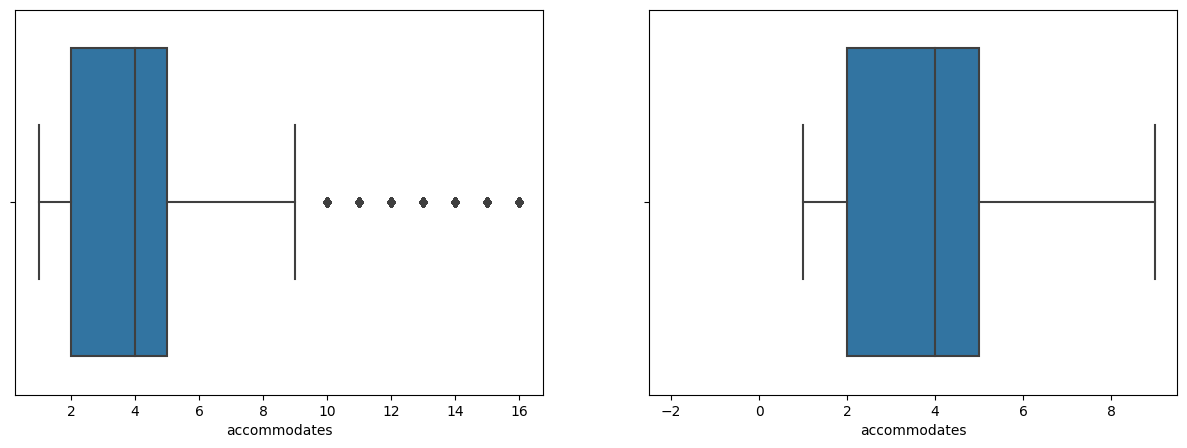

<Figure size 1500x1000 with 0 Axes>

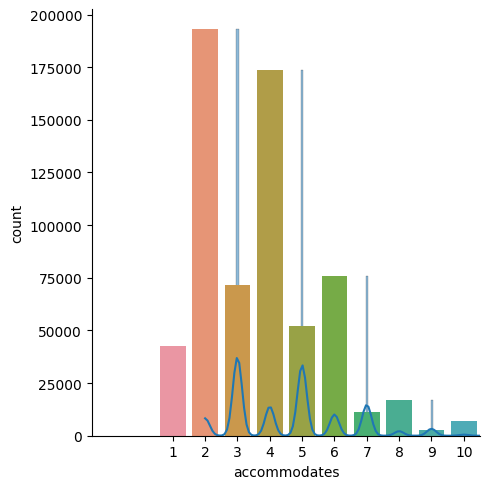

In [205]:
box_graph(base_airbnb, 'accommodates')
hist_graph(base_airbnb, 'accommodates')
bar_graph(base_airbnb,'accommodates') 

Pronto, foram removidas 13146 linhas do seu DataFrame e restaram 640364 linhas dentro dos limites estabelecidos.


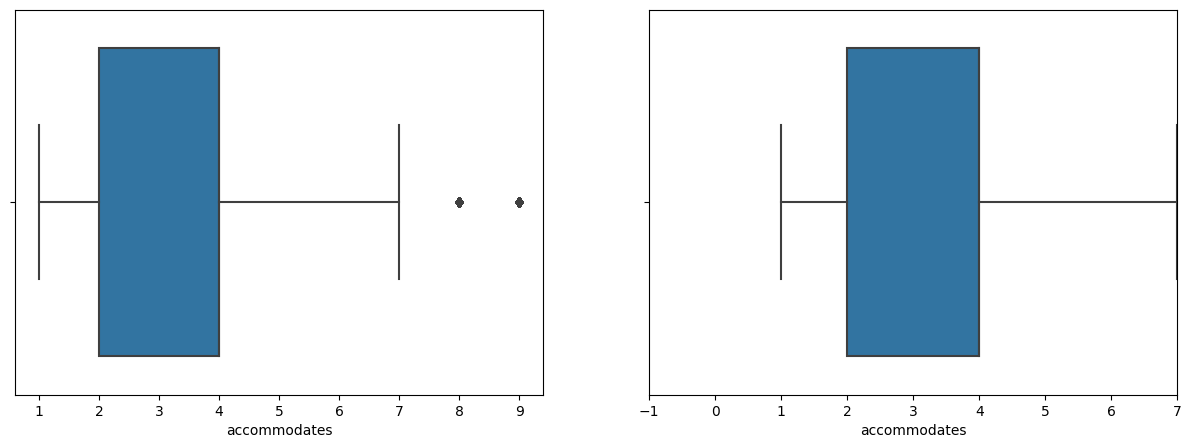

<Figure size 1500x1000 with 0 Axes>

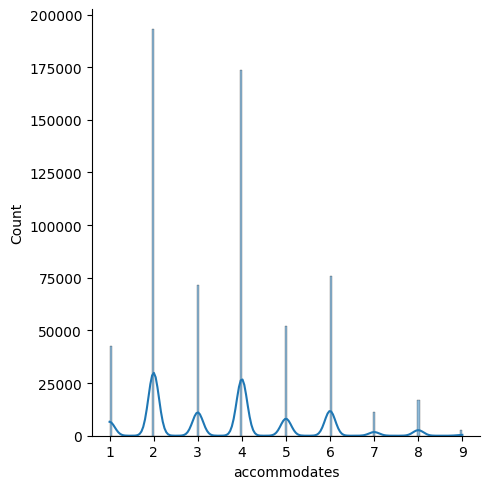

In [206]:
base_airbnb = check_outliers(base_airbnb, 'accommodates')

#### BATHROOMS

<Axes: xlabel='bathrooms', ylabel='count'>

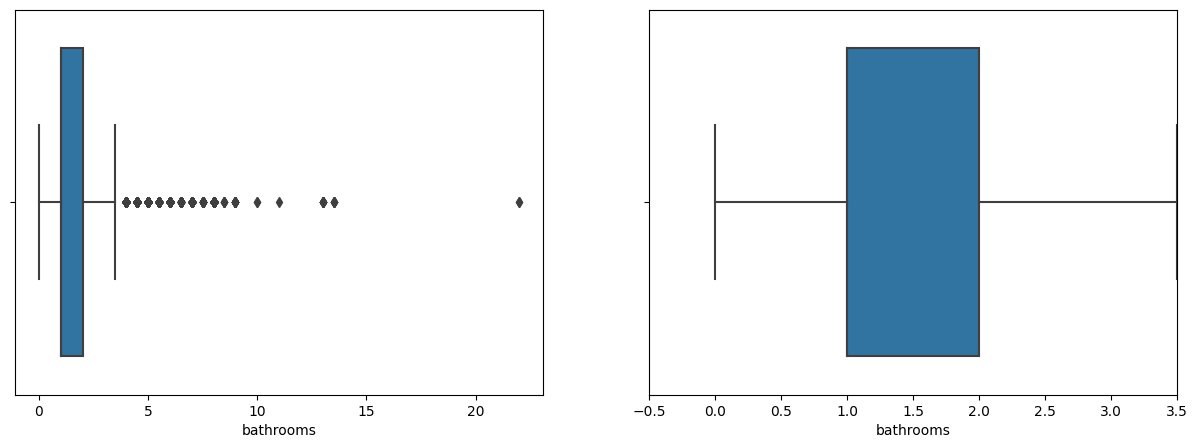

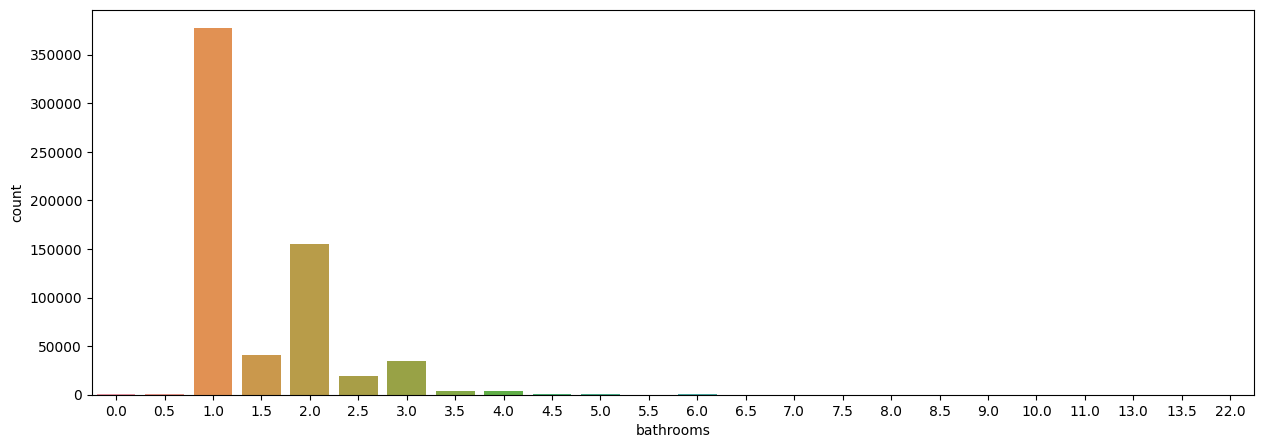

In [207]:
box_graph(base_airbnb, 'bathrooms')
#bar_graph(base_airbnb, 'bathrooms')

plt.figure(figsize=(15,5))
sns.barplot(x= base_airbnb['bathrooms'].value_counts().index, y= base_airbnb['bathrooms'].value_counts())



Pronto, foram removidas 6894 linhas do seu DataFrame e restaram 633470 linhas dentro dos limites estabelecidos.


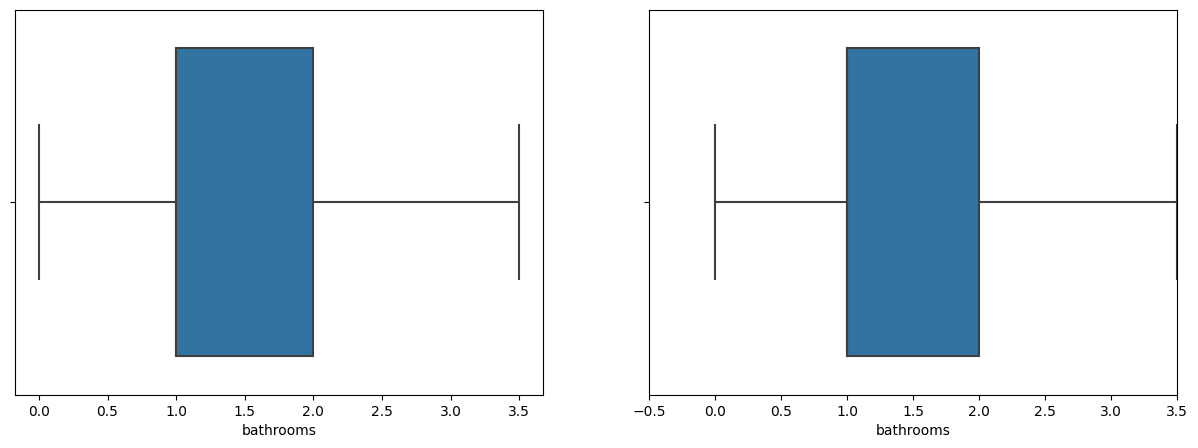

<Figure size 1500x1000 with 0 Axes>

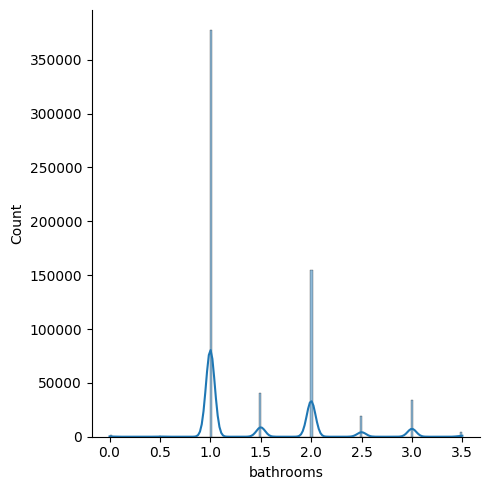

In [208]:
base_airbnb = check_outliers(base_airbnb, 'bathrooms')

#### BEDROOMS

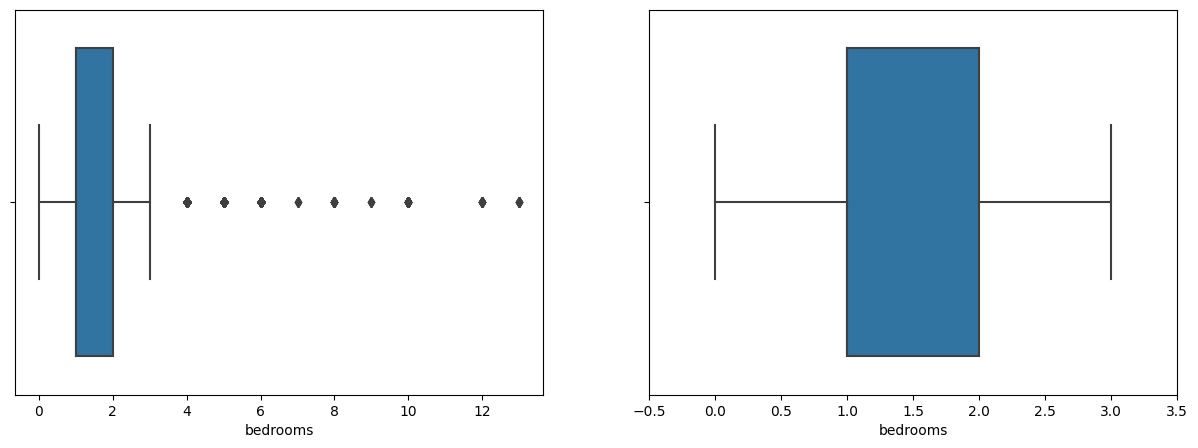

<Figure size 1500x1000 with 0 Axes>

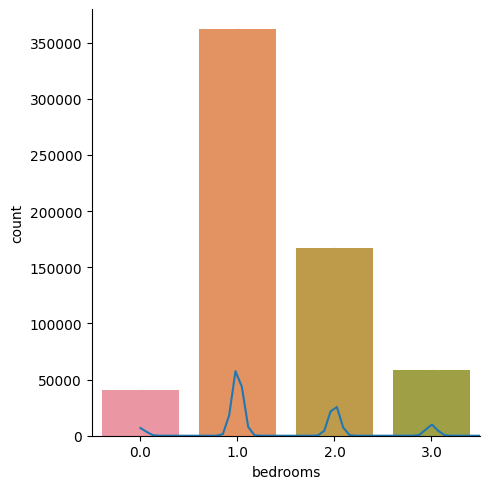

In [209]:
box_graph(base_airbnb, 'bedrooms')
hist_graph(base_airbnb, 'bedrooms')
bar_graph(base_airbnb,'bedrooms') 

Pronto, foram removidas 5482 linhas do seu DataFrame e restaram 627988 linhas dentro dos limites estabelecidos.


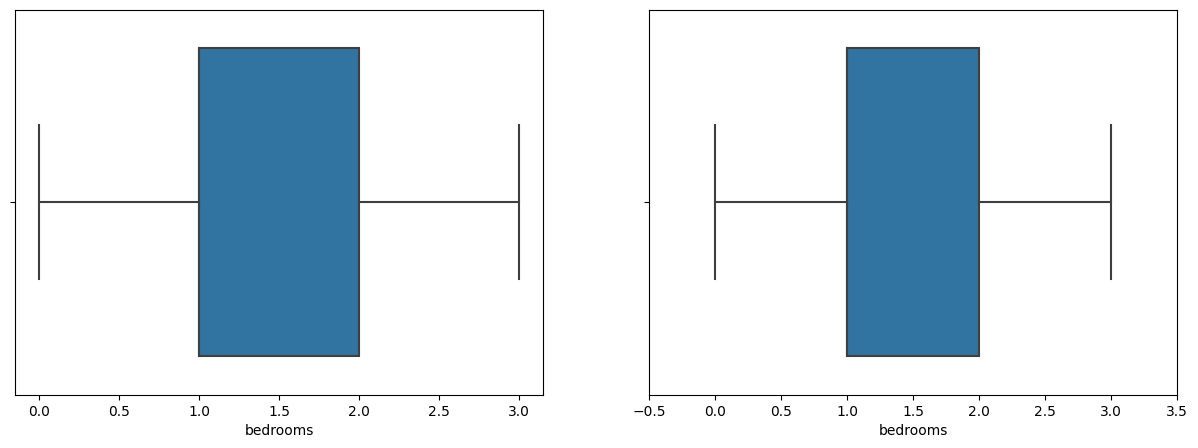

<Figure size 1500x1000 with 0 Axes>

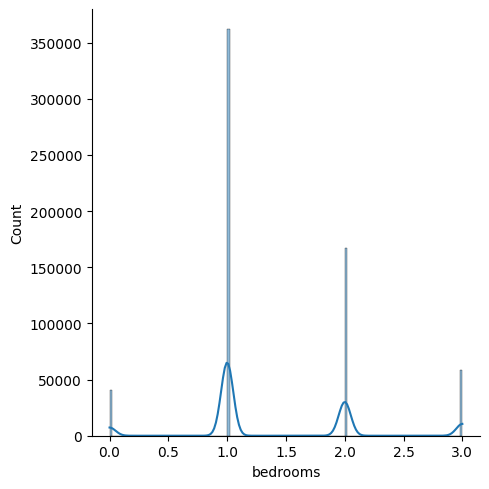

In [210]:
base_airbnb = check_outliers(base_airbnb, 'bedrooms')

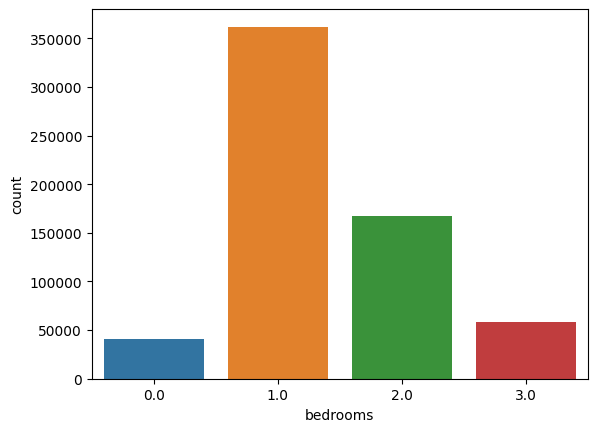

In [211]:
bar_graph(base_airbnb, 'bedrooms')

#### BEDS

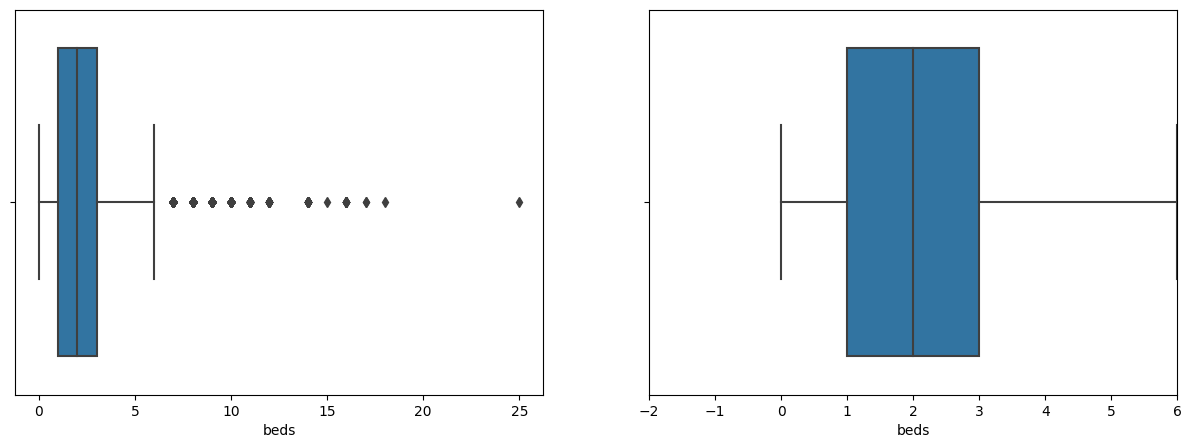

<Figure size 1500x1000 with 0 Axes>

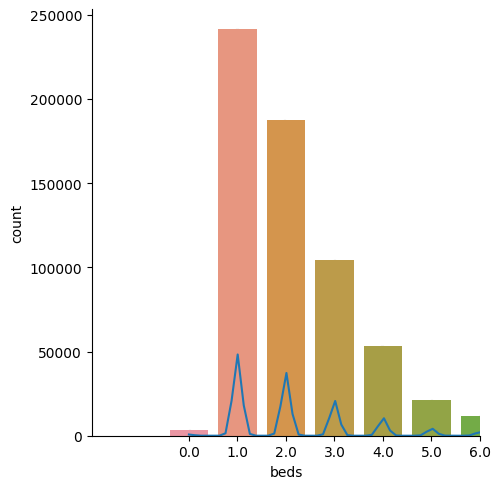

In [212]:
box_graph(base_airbnb, 'beds')
hist_graph(base_airbnb, 'beds')
bar_graph(base_airbnb,'beds') 

Pronto, foram removidas 5622 linhas do seu DataFrame e restaram 622366 linhas dentro dos limites estabelecidos.


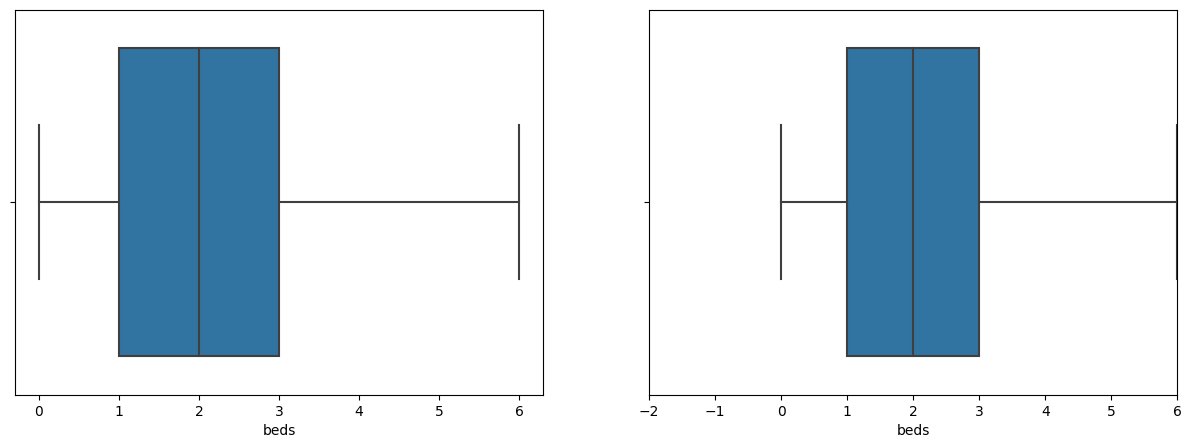

<Figure size 1500x1000 with 0 Axes>

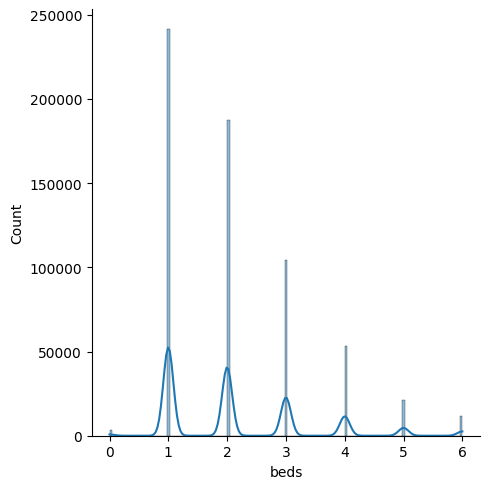

In [213]:
base_airbnb = check_outliers(base_airbnb,'beds')

#### GUESTS INCLUDED

C:\Users\bejr2\AppData\Local\Temp\ipykernel_23072\207970053.py:17: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

C:\Users\bejr2\AppData\Local\Temp\ipykernel_23072\207970053.py:31: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



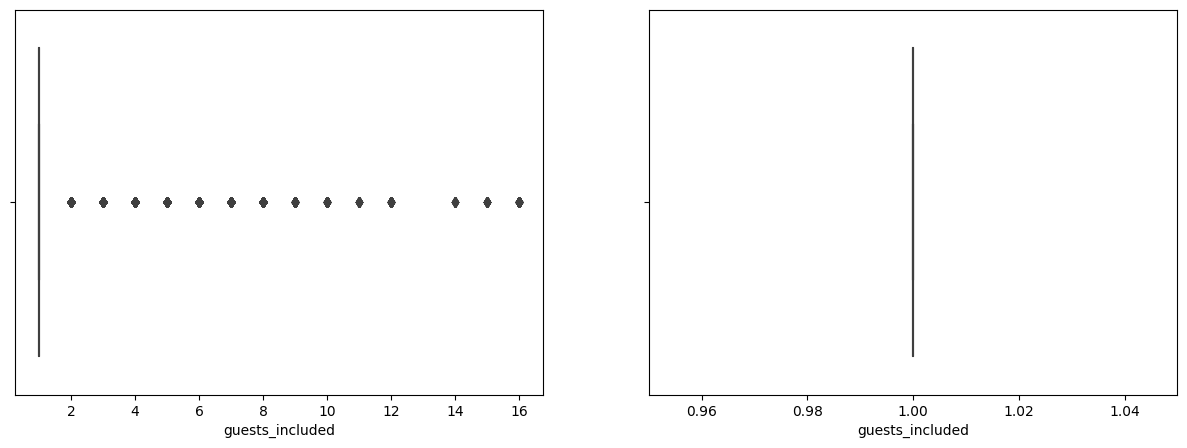

<Figure size 1500x1000 with 0 Axes>

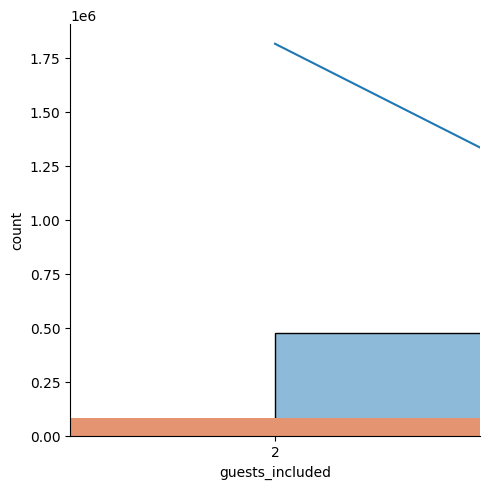

In [214]:
box_graph(base_airbnb, 'guests_included')
hist_graph(base_airbnb, 'guests_included')
bar_graph(base_airbnb,'guests_included')

<Axes: xlabel='guests_included', ylabel='count'>

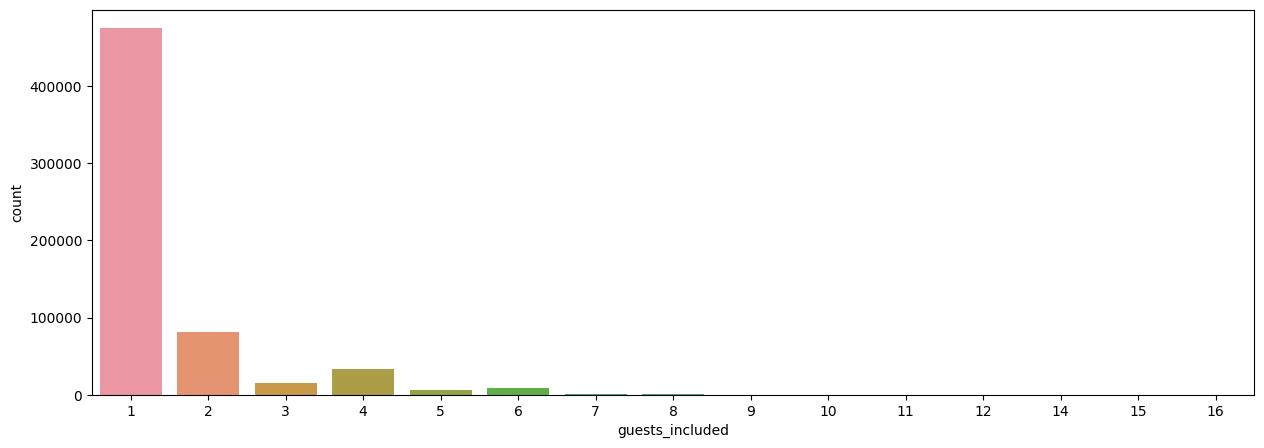

In [215]:
plt.figure(figsize=(15,5))
sns.barplot(x= base_airbnb['guests_included'].value_counts().index, y= base_airbnb['guests_included'].value_counts())

Observando o gráfico, não irei retirar os outliers e sim retirar esse guests_included, pois aparentemente não foi preenchido corretamente, e sim apenas um valor padrão do airbnb

In [216]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)
base_airbnb.shape

(622366, 22)

#### MINIMUM NIGHTS

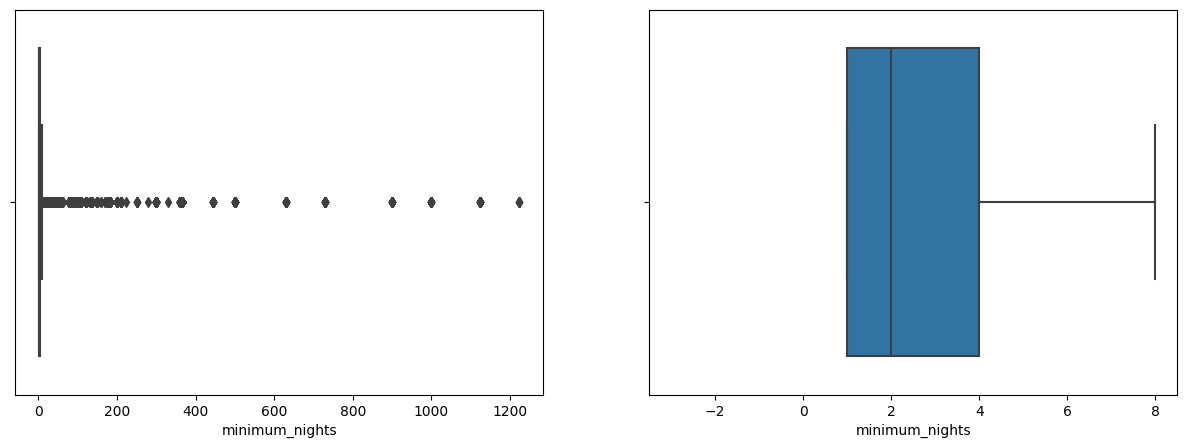

<Figure size 1500x1000 with 0 Axes>

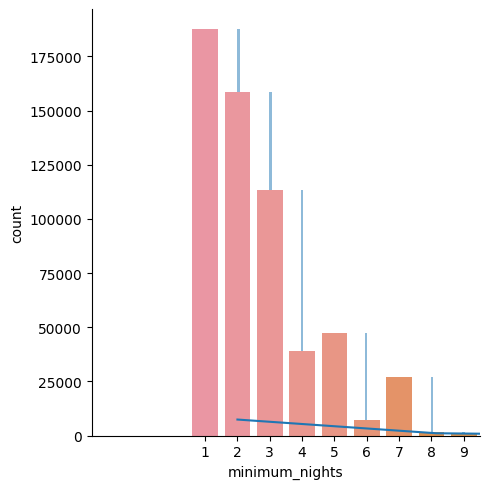

In [217]:
box_graph(base_airbnb, 'minimum_nights')
hist_graph(base_airbnb, 'minimum_nights')
bar_graph(base_airbnb, 'minimum_nights')

Pronto, foram removidas 40383 linhas do seu DataFrame e restaram 581983 linhas dentro dos limites estabelecidos.


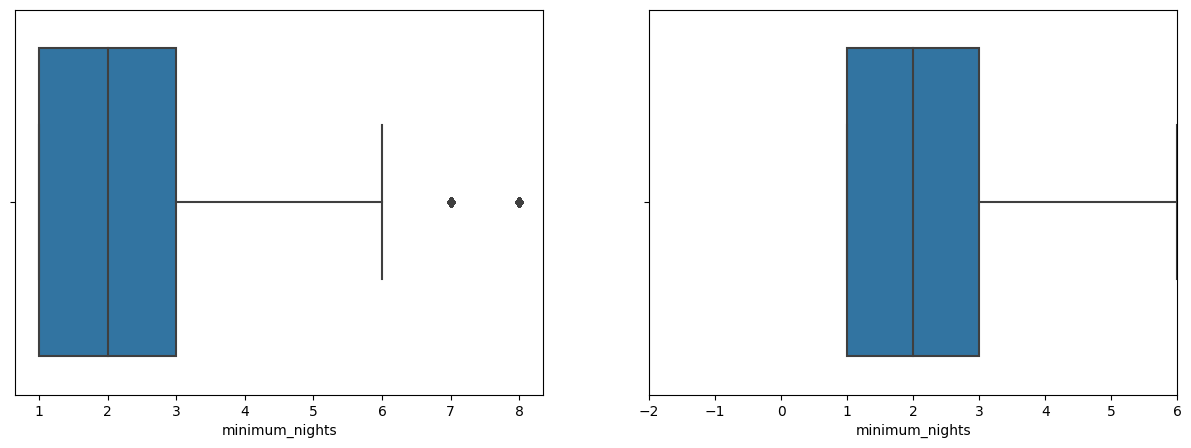

<Figure size 1500x1000 with 0 Axes>

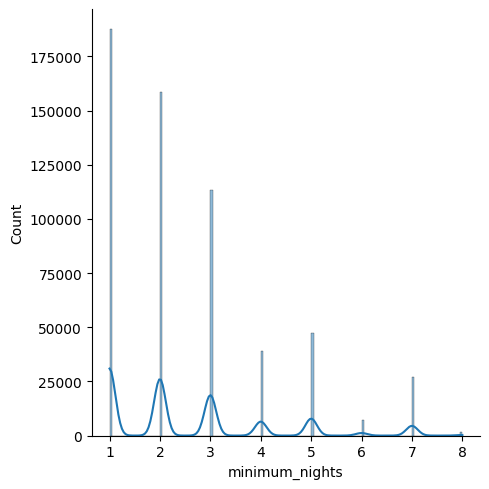

In [218]:
base_airbnb = check_outliers(base_airbnb, 'minimum_nights')

#### MAXIMUM_NIGHTS

Não vejo sentido em manter esse parametro para analisar o preço médio de um imóvel comum.

In [219]:
base_airbnb = base_airbnb.drop('maximum_nights',axis=1)
base_airbnb.shape

(581983, 21)

#### NUMBER OF REVIEWS

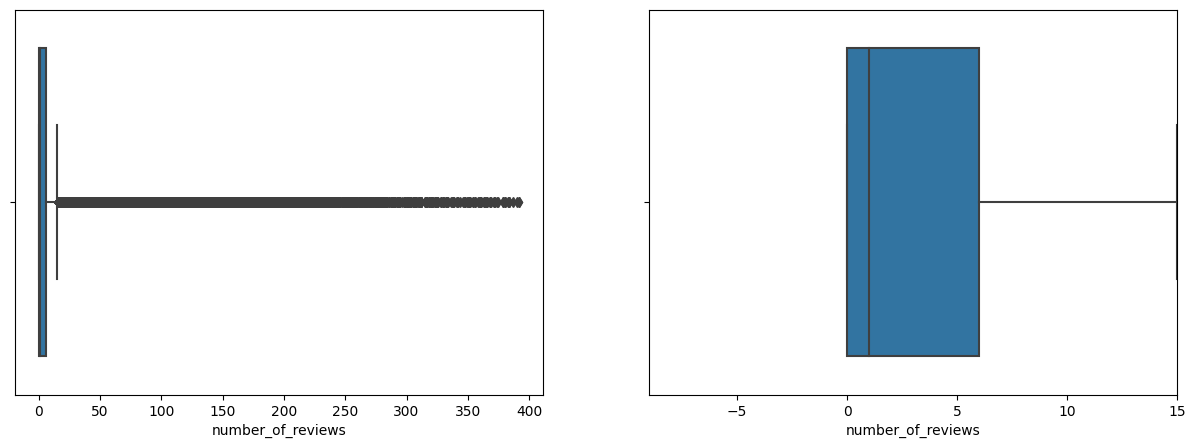

<Figure size 1500x1000 with 0 Axes>

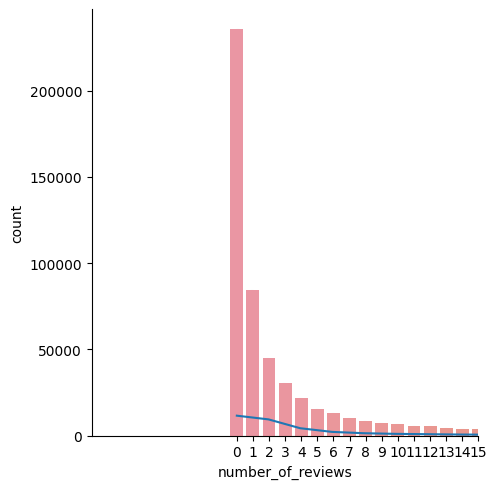

In [220]:
box_graph(base_airbnb, 'number_of_reviews')
hist_graph(base_airbnb, 'number_of_reviews')
bar_graph(base_airbnb,'number_of_reviews') 

Apesar de importante, irei retirar esse numero de reviews, pois a analise é feita para aquela pessoa que quer anunciar pela primeira vez e não sabe ao certo qual preço colocar no próprio imóvel.

In [221]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)
base_airbnb.shape

(581983, 20)

### NEW HEATMAP TO VERIFIRY HOW IS GOING OUR ANALYSIS

[]

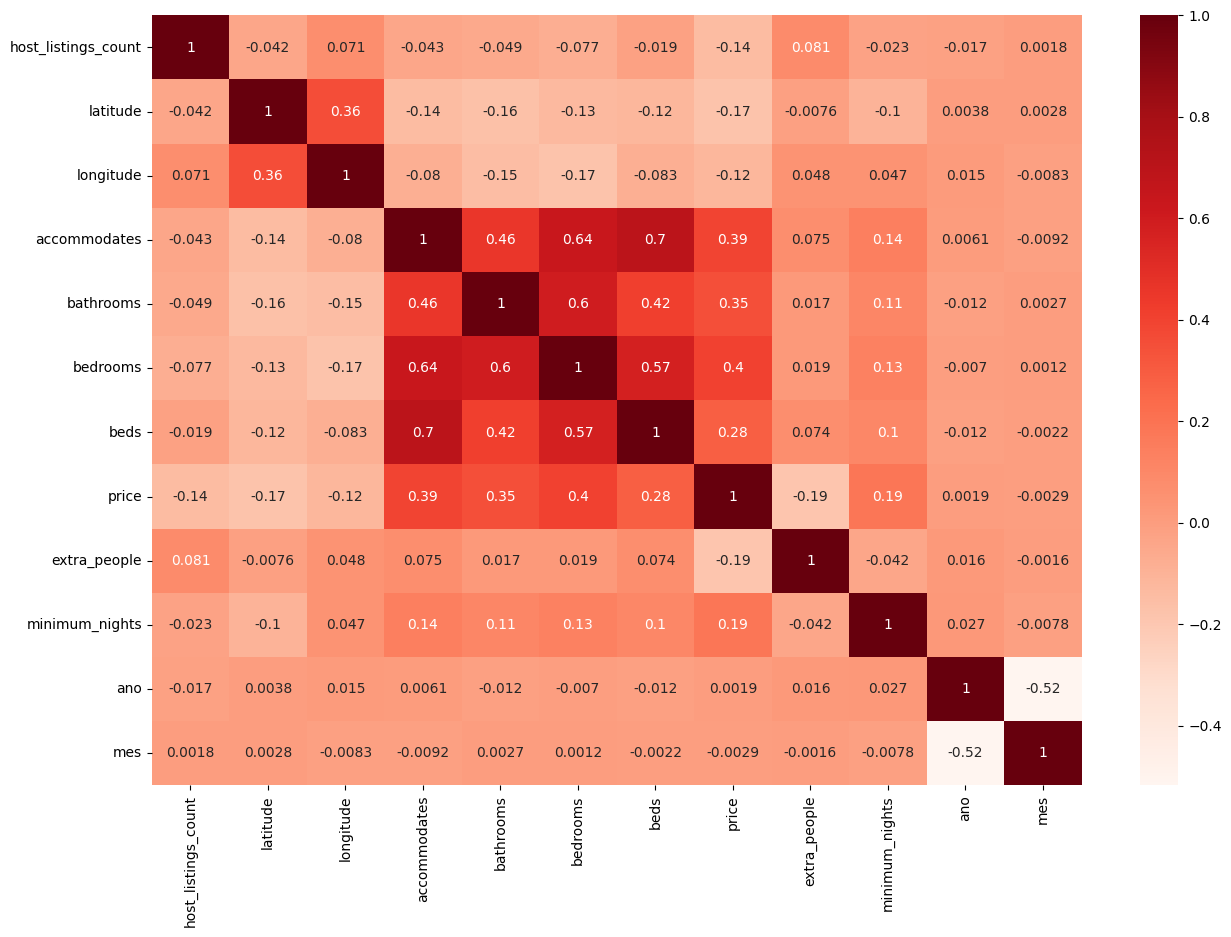

In [222]:
plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb.corr(numeric_only=True),annot=True, cmap='Reds')
plt.plot()

### ANALYSING TEXT COLUMNS

In [223]:
print(base_airbnb.dtypes)
display (base_airbnb.iloc[0,:])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
extra_people                float32
minimum_nights                int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


host_is_superhost                                                           t
host_listings_count                                                       2.0
latitude                                                           -22.965919
longitude                                                          -43.178962
property_type                                                     Condominium
room_type                                                     Entire home/apt
accommodates                                                                5
bathrooms                                                                 1.0
bedrooms                                                                  2.0
beds                                                                      2.0
bed_type                                                             Real Bed
amenities                   {TV,"Cable TV",Internet,Wifi,"Air conditioning...
price                                                           

property_type, room_type, bed_type, amenities, cancellation_policy

#### PROPERTY TYPE

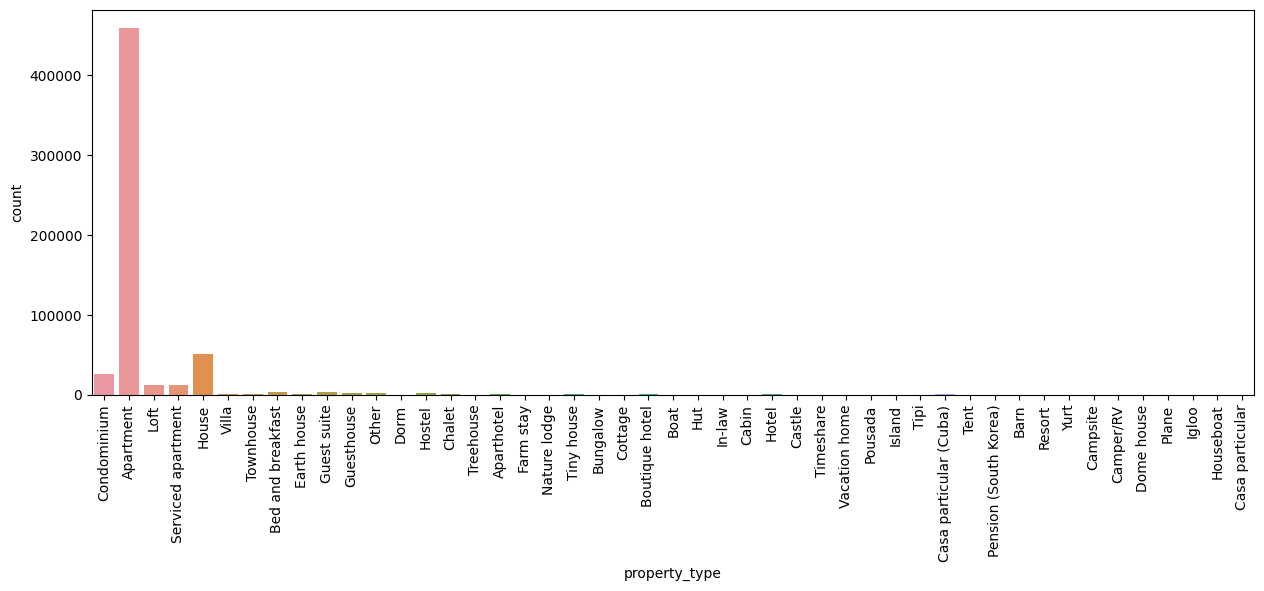

In [224]:
plt.figure(figsize=(15,5))
graph = sns.countplot(x=base_airbnb['property_type'])
graph.tick_params(axis='x', rotation=90)

In [225]:
property_types = base_airbnb['property_type'].value_counts()
print(property_types)

for item in property_types.index:
    if property_types[item] < 2000:
        base_airbnb['property_type'] = base_airbnb['property_type'].replace(f'{item}', 'Others')

print('-'*60)
property_types = base_airbnb['property_type'].value_counts()
print(property_types)


property_type
Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                     

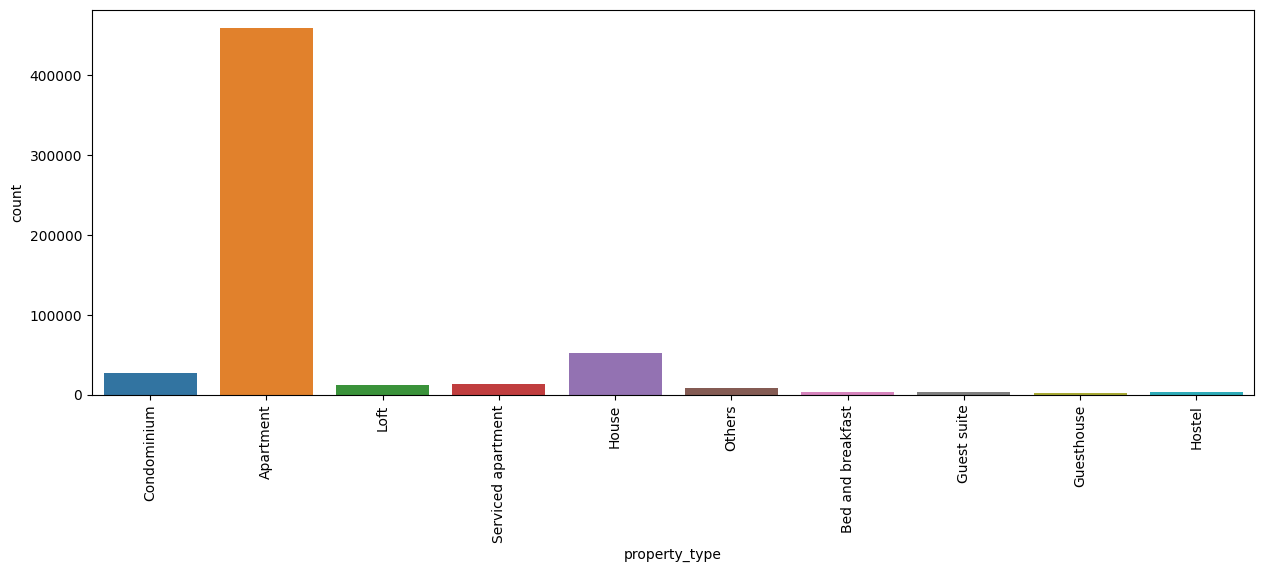

In [226]:
plt.figure(figsize=(15,5))
graph = sns.countplot(x=base_airbnb['property_type'])
graph.tick_params(axis='x', rotation=90)

#### ROOM TYPE

room_type
Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: count, dtype: int64


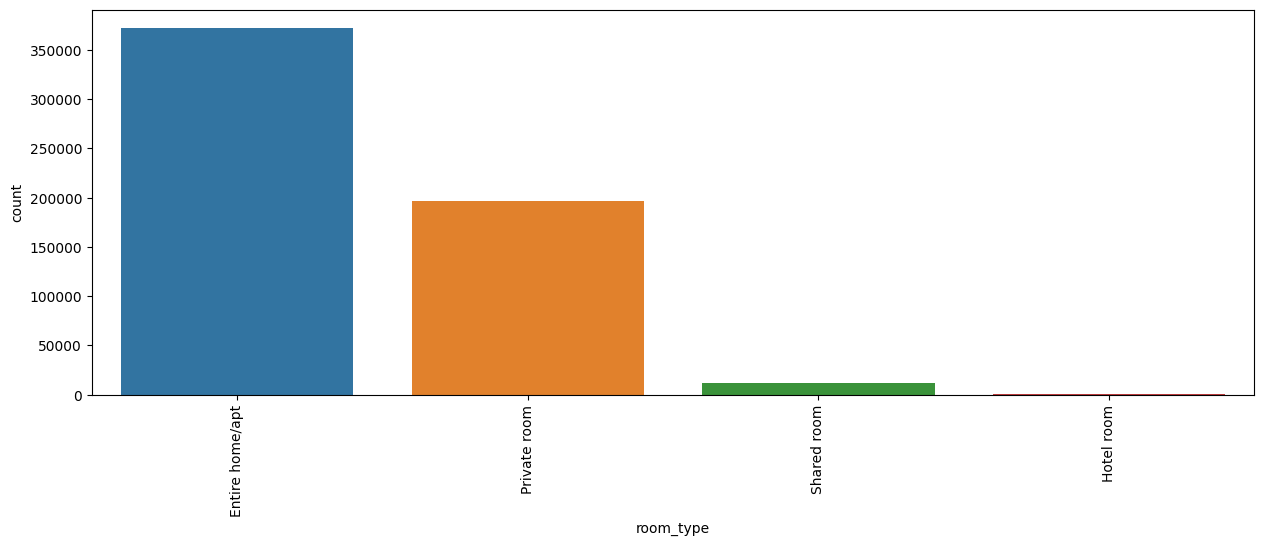

In [227]:
print(base_airbnb['room_type'].value_counts())
plt.figure(figsize=(15,5))
graph = sns.countplot(x=base_airbnb['room_type'])
graph.tick_params(axis='x', rotation=90)

It's not necessary any changes here.

#### BED TYPE

bed_type
Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64


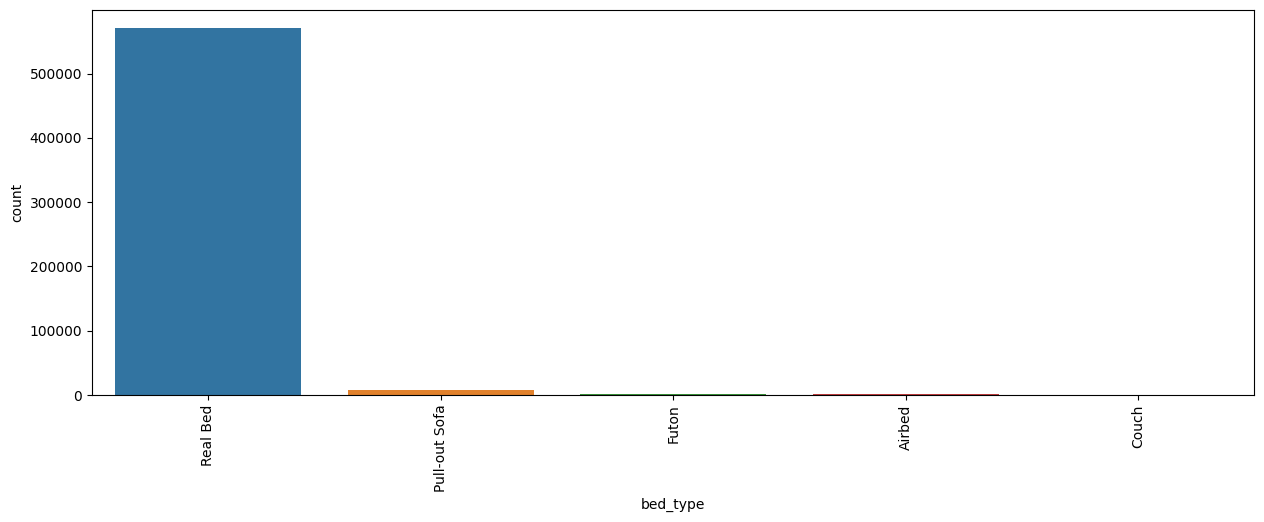

In [228]:
print(base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(15,5))
graph = sns.countplot(x=base_airbnb['bed_type'])
graph.tick_params(axis='x', rotation=90)

In [229]:

bed_types = base_airbnb['bed_type'].value_counts()
print(bed_types)
base_airbnb['bed_type'] = base_airbnb['bed_type'].replace(f'Real Bed', 'Bed')
        

bed_types = base_airbnb['bed_type'].value_counts()
print(bed_types)

for item in bed_types.index:
    if bed_types[item] < 8100:
        base_airbnb['bed_type'] = base_airbnb['bed_type'].replace(f'{item}', 'Others')        

bed_types = base_airbnb['bed_type'].value_counts()
print(bed_types)

bed_type
Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64
bed_type
Bed              570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64
bed_type
Bed       570643
Others     11340
Name: count, dtype: int64


bed_type
Bed       570643
Others     11340
Name: count, dtype: int64


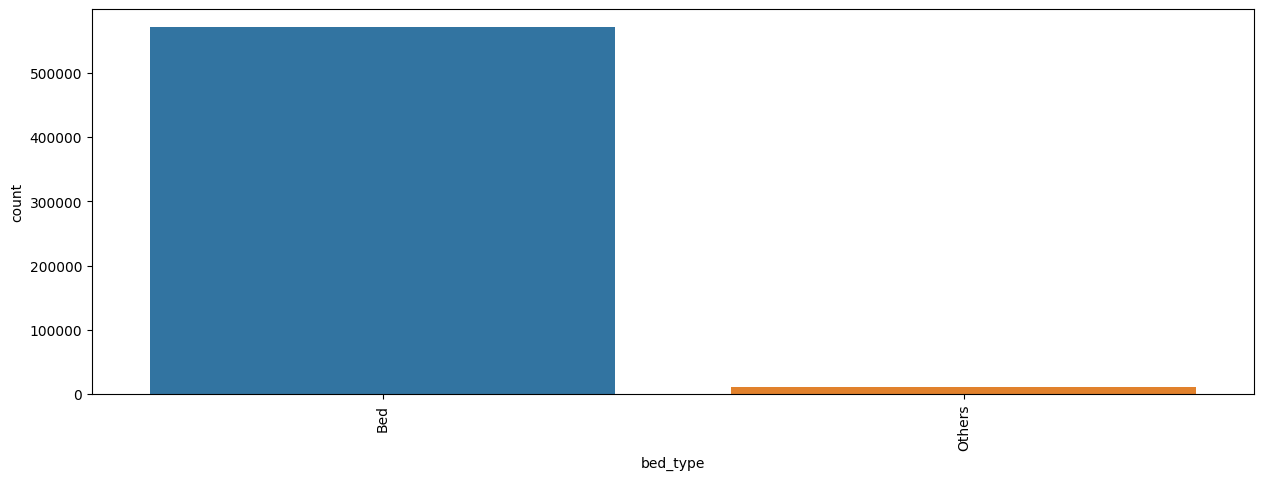

In [230]:
print(base_airbnb['bed_type'].value_counts())
plt.figure(figsize=(15,5))
graph = sns.countplot(x=base_airbnb['bed_type'])
graph.tick_params(axis='x', rotation=90)

#### CANCELLATION POLICY

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64


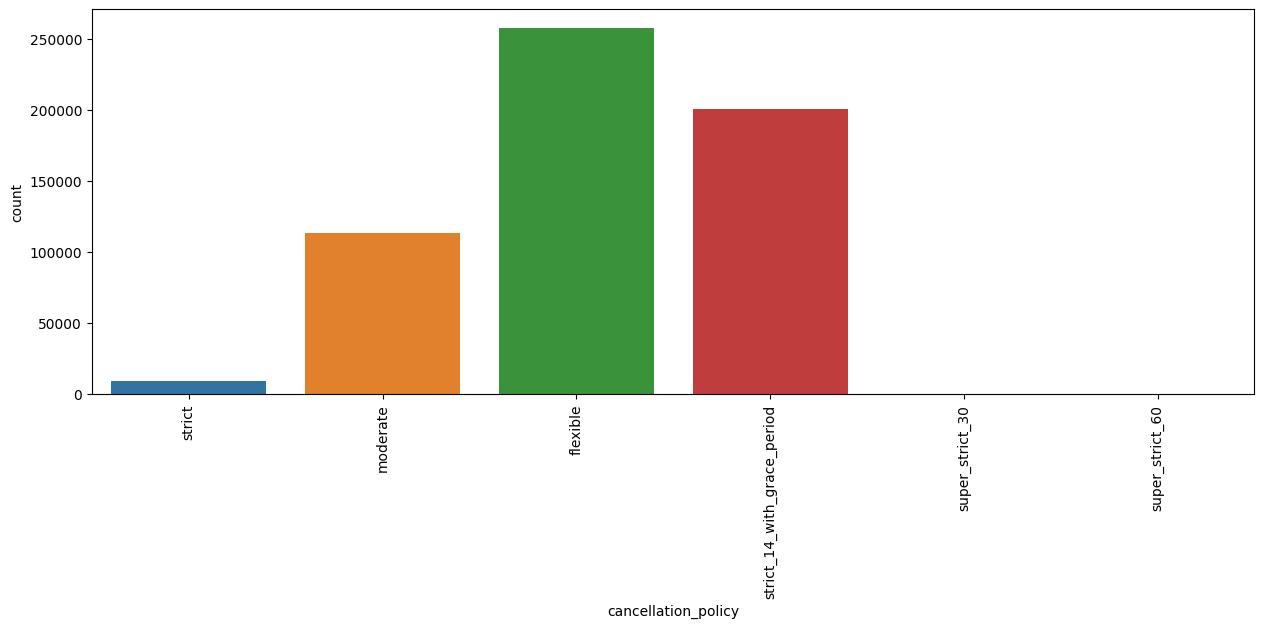

In [231]:
print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15,5))
graph = sns.countplot(x=base_airbnb['cancellation_policy'])
graph.tick_params(axis='x', rotation=90)

In [232]:
cancellation_policy_types = base_airbnb['cancellation_policy'].value_counts()
print(cancellation_policy_types)

for item in cancellation_policy_types.index:
    if cancellation_policy_types[item] < 10000:
        base_airbnb['cancellation_policy'] = base_airbnb['cancellation_policy'].replace(f'{item}', 'strict')   

cancellation_policy_types = base_airbnb['cancellation_policy'].value_counts()
print(cancellation_policy_types)

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64
cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: count, dtype: int64


cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: count, dtype: int64


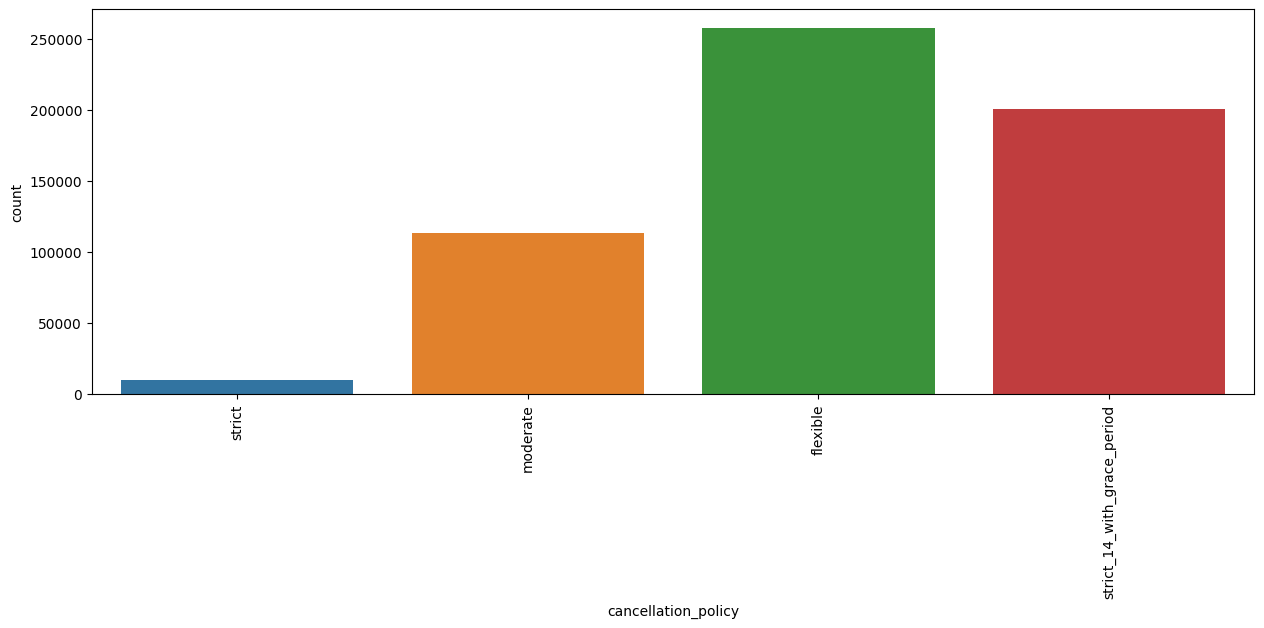

In [233]:
print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15,5))
graph = sns.countplot(x=base_airbnb['cancellation_policy'])
graph.tick_params(axis='x', rotation=90)

#### AMENITIES / LEN(AMENITIES)

In [234]:
print(base_airbnb['amenities'].value_counts())

amenities
{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   6012
{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,Doorman,Elevator,"Buzzer/wireless intercom",Washer}                                                                                                                         

As we can notice above, has too many distinct values to generate any measurement or analysis.

To solve this, we can just analise how many amenities does the anounce have.

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
len_amenities
12    33569
13    33012
11    32982
14    32473
15    31153
      ...  
75        6
77        5
72        5
79        2
71        2
Name: count, Length: 78, dtype: int64


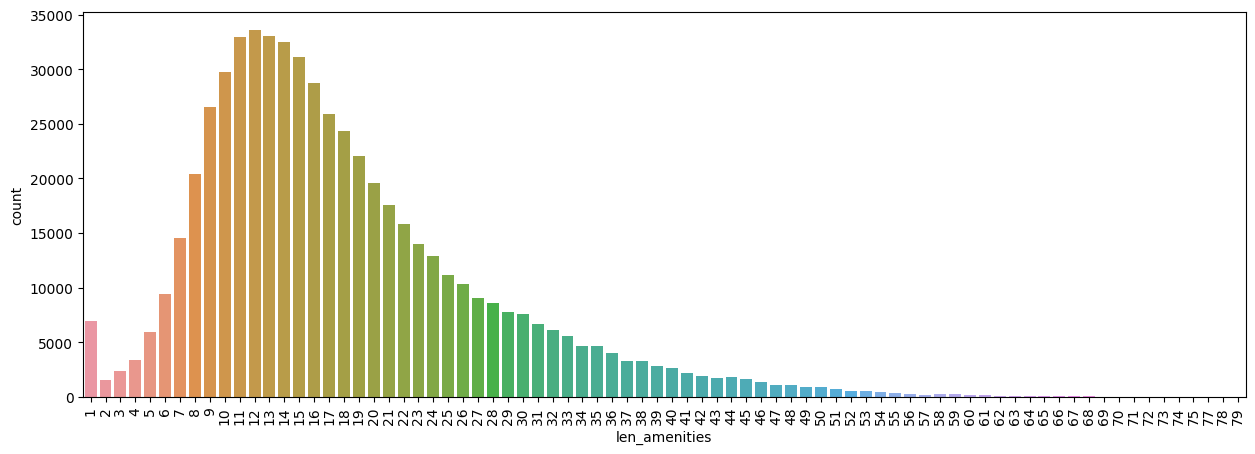

In [235]:
try:
    print(base_airbnb['amenities'].iloc[0].split(','))
    base_airbnb['len_amenities'] = base_airbnb['amenities'].str.split(',').apply(len)
    print (base_airbnb['len_amenities'].value_counts())

    base_airbnb = base_airbnb.drop('amenities',axis=1)
except:
    pass

plt.figure(figsize=(15,5))
graph = sns.countplot(x=base_airbnb['len_amenities'])
graph.tick_params(axis='x', rotation=90)

In [236]:
base_airbnb.dtypes

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
price                       float32
extra_people                float32
minimum_nights                int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
len_amenities                 int64
dtype: object

As an int column, we can analyse its limits and outliers:

(-5.5, 38.5)


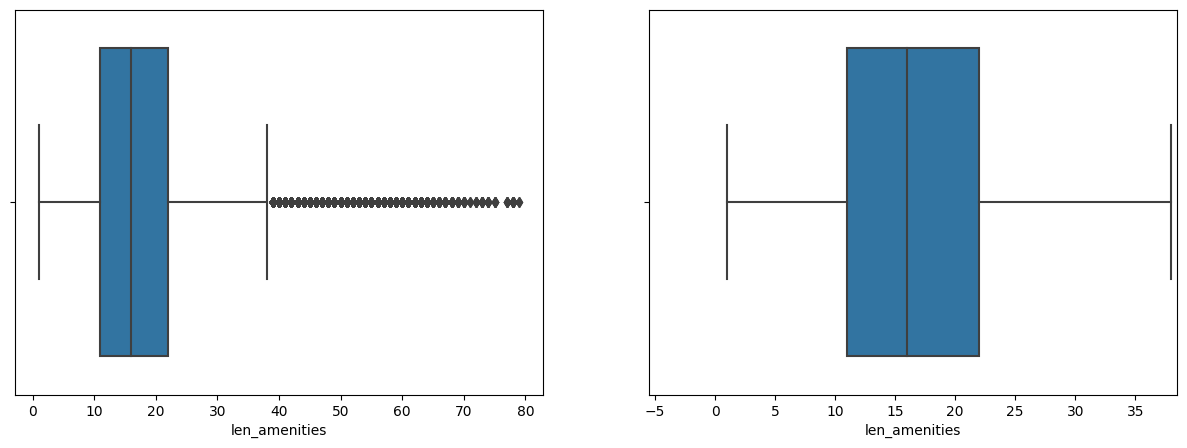

<Figure size 1500x1000 with 0 Axes>

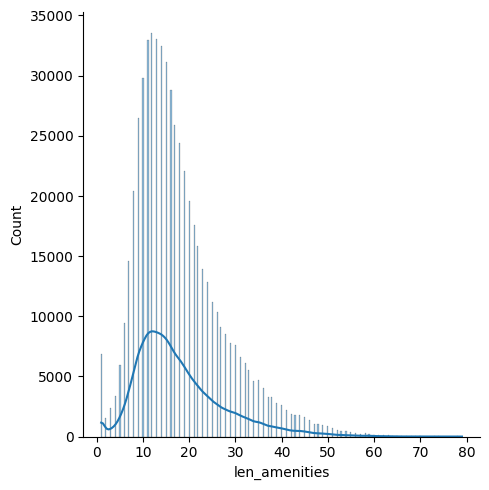

In [237]:
print(limits(base_airbnb,'len_amenities'))
box_graph(base_airbnb,'len_amenities')
hist_graph(base_airbnb,'len_amenities')


We got -5.5 and 38.5 as inferior limits and upper limits, respectively. And we can infer that whose anounced with more than 38 did not anounce properly.

Therefore, we are going to delete those outliers

Pronto, foram removidas 24343 linhas do seu DataFrame e restaram 557640 linhas dentro dos limites estabelecidos.


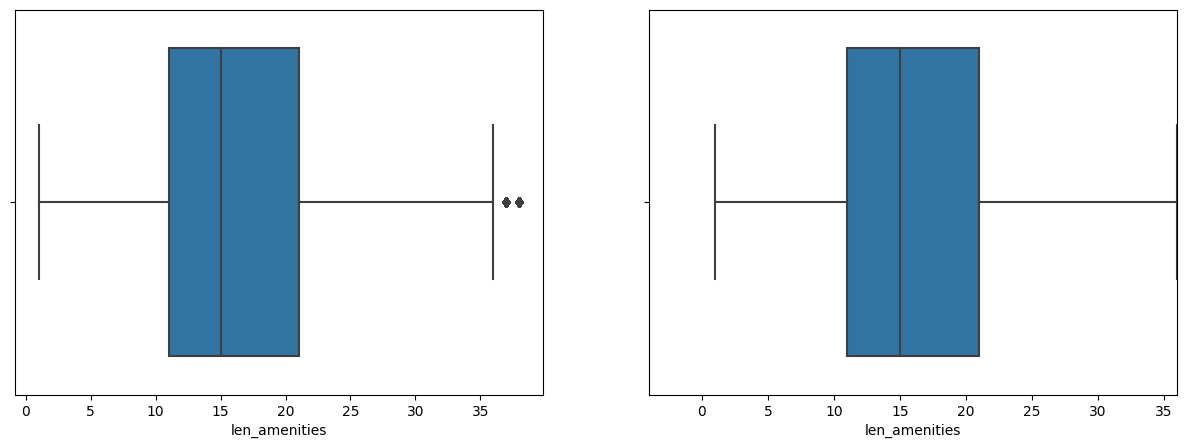

<Figure size 1500x1000 with 0 Axes>

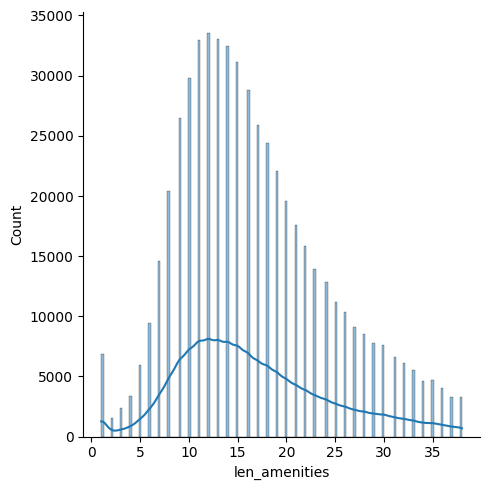

In [238]:
base_airbnb = check_outliers(base_airbnb, 'len_amenities')

### CREATING THE INTERATIVE MAP

In [239]:
base_airbnb.to_csv('FinalDF.csv')